Importanto bibliotecas necessárias

In [86]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Introdução


**Contextualização**


**Tema e Objetivo**


**Base de Dados**


# Manipulando as planilhas de dados

In [87]:
dados_aguafiltrada0 =  pd.read_excel('planilhas/Água_Filtrada_por_município.xlsx')
dados_popmunicipio0 =  pd.read_excel('planilhas/População_Residente_por_Múnicipio.xlsx')
dados_pib0 = pd.read_excel('planilhas/Pib_per_capita_por_municipio.xlsx')
dados_idososcasas0 = pd.read_excel('planilhas/Porcentagem_de_Idosos_nas_Casas.xlsx')
# dados_lixo0 = pd.read_excel('planilhas/Lixo_Municipio.xlsx')
dados_desemprego0 = pd.read_excel('planilhas/Taxa_de_desemprego.xlsx')
dados_analfabetismo0 = pd.read_excel('planilhas/Taxa_de_anafalbetismo.xlsx')
dados_coberturavacinal0 = pd.read_excel('planilhas/Cobertura_vacinal.xlsx')
dados_cobequipessaudebasica0 = pd.read_excel('planilhas/Cobertua_equipe_ atenção_básica_por_Município.xlsx')
dados_pessoasbaixarenda0 = pd.read_excel('planilhas/Porcentagem_de_Pessoas_Baixa_Renda.xlsx')
# dados_escolariedade0 = pd.read_excel('planilhas/Escolariedade.xlsx')
dados_idadepopulacional0 = pd.read_excel('planilhas/Idade_população.xlsx')
dados_tuberculose0 = pd.read_excel('planilhas/Tuberculose.xlsx')
dados_diabetes0= pd.read_excel('planilhas/Tuberculosos_com_diabetes.xlsx')
dados_tuber_vacinacao0 = pd.read_excel('planilhas/tuberculose vacinacao.xlsx')
dados_ppl0 = pd.read_excel('planilhas/tuberculose_em_ppl.xlsx')
dados_letalidade0 = pd.read_excel('planilhas/tuberculose_letalidade.xlsx')
dados_poprua0 = pd.read_excel('planilhas/tuberculose_pop_sit_rua.xlsx')
dados_alcolismo0 = pd.read_excel('planilhas/tuberculosos e alcolismo.xlsx')
dados_tabagismo0 = pd.read_excel('planilhas/tuberculosos e tabagismo.xlsx')
dados_outrasdoencas0 = pd.read_excel('planilhas/tuberculosos_com_outras_doenças.xlsx')


### Limpando as planilhas de dados

In [88]:
#Função de limpeza
#Função que separa o código do nome do município
def separa_codigo(planilha):
    colunas = list(planilha)
    if "Município" in colunas:
        planilha[['Código do Município', 'Nome do Município']] = planilha['Município'].str.split(' ', n=1, expand=True)
        plan = planilha.drop('Município', axis=1)
        planilha_limpa = plan.drop('Nome do Município', axis=1)
    else: 
        planilha_limpa = planilha
    return planilha_limpa

#função que remove as informações redundantes sobre turberculose
#remove os dados ignorados e os dados com não, pois só me interessa sim e total
def remove_colunas_desnecessarias(planilha):
    colunas = list(planilha)
    if 'Ign/Branco' in colunas:
        del planilha['Ign/Branco']
    if 'Não' in colunas: 
        del planilha['Não']
    if 'Total' in colunas: 
        del planilha['Total']
    return planilha


#função de limpeza que substitui valores nulos (dados por -) por zero
def exclui_valor_hifen(planilha):
    return planilha.replace('-', '0')

In [89]:
list(dados_diabetes0)


['Município', 'Ign/Branco', 'Diabéticos', 'Não', 'Total']

- Limpando dados do DataSus

In [90]:
#Limpa linhas inúteis
df_aguafiltrada = dados_aguafiltrada0.drop(dados_aguafiltrada0.index[-2:])
df_popmunicipio = dados_popmunicipio0.drop(dados_popmunicipio0.index[-4:])
df_pib = dados_pib0.drop(dados_pib0.index[-11:])
df_idososcasas= dados_idososcasas0.drop(dados_idososcasas0.index[-4:])
# df_lixo1 = dados_lixo0.drop(dados_lixo0.index[-2:])
# df_lixo = df_lixo1.drop(labels=['Outro destino', 'Total'], axis=1)
df_desemprego = dados_desemprego0.drop(dados_desemprego0.index[-8:])
df_analfabetismo = dados_analfabetismo0.drop(dados_analfabetismo0.index[-4:])
df_coberturavacinal = dados_coberturavacinal0.drop(dados_coberturavacinal0.index[-3:])
df_cobequipessaudebasica = dados_cobequipessaudebasica0.drop(dados_cobequipessaudebasica0.index[-22:])
df_pessoasbaixarenda = dados_pessoasbaixarenda0.drop(dados_pessoasbaixarenda0.index[-10:])
# df_escolariedade = dados_escolariedade0.drop(dados_escolariedade0.index[-8:])
df_diabetes = remove_colunas_desnecessarias(dados_diabetes0)
df_ppl = remove_colunas_desnecessarias(dados_ppl0)
df_letalidade = remove_colunas_desnecessarias(dados_letalidade0)
df_poprua = remove_colunas_desnecessarias(dados_poprua0)
df_alcolismo = remove_colunas_desnecessarias(dados_alcolismo0)
df_tabagismo = remove_colunas_desnecessarias(dados_tabagismo0)
df_outrasdoencas = remove_colunas_desnecessarias(dados_outrasdoencas0)

#Separa os códios dos nomes e deixa as planilhas prontas para mergir
df_aguafiltrada[['Código do Município', 'Nome do Município']] = df_aguafiltrada['Município'].str.split(' ', n=1, expand=True)
dados_aguafiltrada = df_aguafiltrada.drop('Município', axis=1)
dados_popmunicipio = separa_codigo(df_popmunicipio)
dados_pib = separa_codigo(df_pib)
dados_idososcasas= separa_codigo(df_idososcasas)
# dados_lixo = separa_codigo(df_lixo)
dados_desemprego = separa_codigo(df_desemprego)
dados_analfabetismo = separa_codigo(df_analfabetismo)
dados_coberturavacinal = separa_codigo(df_coberturavacinal)
dados_cobequipessaudebasica = separa_codigo(df_cobequipessaudebasica)
dados_pessoasbaixarenda = separa_codigo(df_pessoasbaixarenda)
# dados_escolariedade = separa_codigo(df_escolariedade)
dados_idadepopulacional = separa_codigo(dados_idadepopulacional0)
dados_tuberculose = separa_codigo(dados_tuberculose0)
dados_diabetes = separa_codigo(df_diabetes)
dados_vacinabcg = separa_codigo(dados_tuber_vacinacao0)
dados_ppl = separa_codigo(df_ppl)
dados_letalidade = separa_codigo(df_letalidade)
dados_poprua = separa_codigo(df_poprua)
dados_alcolismo = separa_codigo(df_alcolismo)
dados_tabagismo = separa_codigo(df_tabagismo)
dados_outrasdoencas = separa_codigo(df_outrasdoencas)



- Limpando dados do IBGE

In [91]:
dados_IBGE = pd.read_excel('planilhas/IDH IBGE.xlsx')
dados_SAUDE = pd.read_excel('planilhas/IBGE_2010_saude_total.xlsx')
del dados_IBGE['Código da Unidade da Federação']
del dados_IBGE['Código IBGE da Mesoregião']
del dados_IBGE['Nome da Mesoregião']
del dados_IBGE['Código IBGE da Microregião']
del dados_IBGE['IDHM 1991']
del dados_IBGE['IDHM 2000']
del dados_IBGE['Nome da Microregião']

c:\Users\gabri\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


##### **Merging das bases de dados**

In [92]:
#Mergindo as planilhas do IBGE
result = pd.merge(dados_IBGE, dados_SAUDE, how='inner', on='Código IBGE do Município')
#Renomeando a coluna com os códigos de município
result.rename(columns={'Código IBGE do Município': 'Código do Município'}, inplace=True)
result["Código do Município"] = result["Código do Município"] .astype(str)
result_1 = pd.merge(dados_pib, dados_aguafiltrada, how='inner', on='Código do Município')
result_2 = pd.merge(result_1, dados_popmunicipio, how='inner', on='Código do Município')
result_3 = pd.merge(result_2 , dados_idososcasas, how='inner', on='Código do Município')
result_4 = pd.merge(result_3, dados_analfabetismo, how='inner', on='Código do Município')
result_5 = pd.merge(result_4, dados_desemprego, how='inner', on='Código do Município')
# result_6 = pd.merge(result_5, dados_lixo, how='inner', on='Código do Município')
result_7 = pd.merge(result_5, dados_coberturavacinal, how='inner', on='Código do Município')
result_8 = pd.merge(result_7, dados_pessoasbaixarenda, how='inner', on='Código do Município')
# result_9 = pd.merge(result_8, dados_escolariedade, how='inner', on='Código do Município')
result_10 = pd.merge(result_8, dados_tuberculose, how='inner', on='Código do Município')
result_10["Código do Município"] = result_10["Código do Município"] .astype(str)
result_11 = pd.merge(result_10, result, how='inner', on='Código do Município')
result_12 = pd.merge(result_11, dados_idadepopulacional, how='inner', on='Código do Município')
result_13 = pd.merge(result_12, dados_diabetes, how='inner', on='Código do Município')
result_14 = pd.merge(result_13, dados_vacinabcg, how='inner', on='Código do Município')
result_15 = pd.merge(result_14, dados_ppl, how='inner', on='Código do Município')
result_16 = pd.merge(result_15, dados_letalidade, how='inner', on='Código do Município')
result_17 = pd.merge(result_16, dados_poprua, how='inner', on='Código do Município')
result_18 = pd.merge(result_17, dados_alcolismo, how='inner', on='Código do Município')
result_19 = pd.merge(result_18, dados_tabagismo, how='inner', on='Código do Município')
result_20 = pd.merge(result_19, dados_outrasdoencas, how='inner', on='Código do Município')



In [106]:
result_20

,PIB_per_capita,Código do Município,Trat.Água_Filtrada,Nome do Município,População_residente,%idosos_resid_como_out_parente,Taxa_de_analfabetismo,Taxa_de_desemprego_16a_e+,Coberturas Vacinais,%_população_com_renda_,...,70 a 79 anos,80 anos e mais,Diabéticos,BCG,PPL,Óbito por tuberculose,Moradores de rua,Alcolismo,Tabagismo,Doenças pré-existentes
0,15068.72,110004,11856.0,CACOAL,80396.0,13.4,8.3,5.87,78.515834,32.10,...,2055,818,2,1366,-,1,-,-,-,-
1,15895.39,110012,5903.0,JI-PARANA,119314.0,14.4,7.6,5.61,85.980773,28.65,...,2725,1075,2,2173,-,2,-,5,-,2
2,8742.24,110014,4372.0,NOVA BRASILANDIA D'OESTE,20335.0,9.5,11.2,3.54,85.445745,48.05,...,512,149,1,337,-,1,-,-,-,-
3,21231.04,110020,14812.0,PORTO VELHO,438458.0,16.8,5.2,5.63,76.445173,25.30,...,6779,2786,23,8499,-,6,-,34,-,25
4,9672.18,110033,393.0,NOVA MAMORE,23069.0,10.2,12.6,3.74,72.921635,54.20,...,405,151,-,358,-,1,-,2,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,22502.18,520870,49324.0,GOIANIA,1325333.0,14.9,3.1,5.05,71.136731,15.20,...,37860,16052,31,23466,-,17,-,76,-,131
625,21409.18,520910,8864.0,GOIATUBA,33078.0,11.2,8.1,5.27,72.196000,20.79,...,1354,514,-,373,-,1,-,-,-,-
626,14994.19,521930,6119.0,SANTA HELENA DE GOIAS,37123.0,8.6,10.9,6.02,73.026354,23.73,...,1281,523,-,511,-,1,-,3,-,-
627,8740.02,522185,19995.0,VALPARAISO DE GOIAS,133463.0,18.2,3.4,6.97,78.555988,28.50,...,1924,654,2,3432,-,1,-,3,-,3


In [93]:
sem_hifen = exclui_valor_hifen(result_20)
sem_na = sem_hifen.fillna(0)
df = sem_na.drop(sem_na.index[-5:])


In [94]:
import scipy.stats as st
st.pearsonr(result_20['IDHM 2010'], result_20['Óbito por tuberculose']/result_20['População_residente'])

PearsonRResult(statistic=-0.26203435720231455, pvalue=2.4604320387854165e-11)

In [95]:
# result["Total de estabelecimentos de saúde"] = result["Estabelecimentos de Saúde privado total"] + result["Estabelecimentos de Saúde público total"]

##### **Bases de dados**

In [96]:
df.shape

(624, 29)

In [97]:
df2 = df.copy()
df2.columns

Index(['PIB_per_capita', 'Código do Município', 'Trat.Água_Filtrada',
       'Nome do Município', 'População_residente',
       '%idosos_resid_como_out_parente', 'Taxa_de_analfabetismo',
       'Taxa_de_desemprego_16a_e+', 'Coberturas Vacinais',
       '%_população_com_renda_', 'Casos de Tuberculose',
       'Sigla da Unidade da Federação', 'Nome das Grandes Regiões',
       'IDHM 2010', 'Estabelecimentos de Saúde privado total',
       'Estabelecimentos de Saúde público total', 'Menor 1 ano', '1 a 4 anos',
       '60 a 69 anos', '70 a 79 anos', '80 anos e mais', 'Diabéticos', 'BCG',
       'PPL', 'Óbito por tuberculose', 'Moradores de rua', 'Alcolismo',
       'Tabagismo', 'Doenças pré-existentes'],
      dtype='object')

In [98]:
# quant = ['PIB_per_capita', 'Trat.Água_Filtrada', 'População_residente', '%idosos_resid_como_out_parente', 
#        'Taxa_de_analfabetismo','Taxa_de_desemprego_16a_e+', 'Coberturas Vacinais', '%_população_com_renda_', 
#        'IDHM 2010','Estabelecimentos de Saúde privado total','Estabelecimentos de Saúde público total', 'Menor 1 ano', '1 a 4 anos',
#        '60 a 69 anos', '70 a 79 anos', '80 anos e mais', 'Diabéticos',
#        'PPL', 'Moradores de rua', 'Alcolismo',
#        'Tabagismo', 'Doenças pré-existentes', 'BCG',
#        'Óbito por tuberculose', 'Casos de Tuberculose']
# var_quantitativas = df2[quant]
# var_quantitativas.head()

In [99]:
# #Transformando colunas MIXED em float (sim, eu fiz na mão porque não to sabendo pensar)
# var_quantitativas['Jogado em terreno baldio ou logradouro'] = var_quantitativas['Jogado em terreno baldio ou logradouro'].astype(float)
# var_quantitativas['Jogado em rio, lago ou mar'] = var_quantitativas['Jogado em rio, lago ou mar'].astype(float)

In [100]:
#função relativiza per capta
def relativiza(planilha):
    
    quantitativas = ['Trat.Água_Filtrada', 'Estabelecimentos de Saúde privado total',
                    'Estabelecimentos de Saúde público total',  'Menor 1 ano', '1 a 4 anos',
       '60 a 69 anos', '70 a 79 anos', '80 anos e mais', 'Diabéticos', 'BCG',
       'PPL', 'Óbito por tuberculose', 'Moradores de rua', 'Alcolismo',
       'Tabagismo', 'Doenças pré-existentes','Casos de Tuberculose']
    
    for variavel in quantitativas:
        planilha[variavel] = planilha[variavel].astype(float)
        

    # Substituindo as colunas pela divisão
    for coluna in quantitativas:
        planilha[coluna] = planilha[coluna] / df2['População_residente']

    return planilha



var_quantitativas = relativiza(df2)

In [101]:
quant = ['PIB_per_capita', 'Trat.Água_Filtrada', 'População_residente', '%idosos_resid_como_out_parente', 
       'Taxa_de_analfabetismo','Taxa_de_desemprego_16a_e+', 'Coberturas Vacinais', '%_população_com_renda_', 
       'IDHM 2010','Estabelecimentos de Saúde privado total','Estabelecimentos de Saúde público total', 'Menor 1 ano', '1 a 4 anos',
       '60 a 69 anos', '70 a 79 anos', '80 anos e mais', 'Diabéticos',
       'PPL', 'Moradores de rua', 'Alcolismo',
       'Tabagismo', 'Doenças pré-existentes', 'BCG',
       'Óbito por tuberculose', 'Casos de Tuberculose']
var_quantitativas = df2[quant]
var_quantitativas.head()

,PIB_per_capita,Trat.Água_Filtrada,População_residente,%idosos_resid_como_out_parente,Taxa_de_analfabetismo,Taxa_de_desemprego_16a_e+,Coberturas Vacinais,%_população_com_renda_,IDHM 2010,Estabelecimentos de Saúde privado total,...,80 anos e mais,Diabéticos,PPL,Moradores de rua,Alcolismo,Tabagismo,Doenças pré-existentes,BCG,Óbito por tuberculose,Casos de Tuberculose
0,15068.72,0.147470,80396.0,13.4,8.3,5.87,78.515834,32.10,0.718,0.000261,...,0.010175,0.000025,0.0,0.0,0.000000,0.0,0.000000,0.016991,0.000012,0.000336
1,15895.39,0.049474,119314.0,14.4,7.6,5.61,85.980773,28.65,0.714,0.000327,...,0.009010,0.000017,0.0,0.0,0.000042,0.0,0.000017,0.018212,0.000017,0.000243
2,8742.24,0.214999,20335.0,9.5,11.2,3.54,85.445745,48.05,0.643,0.000049,...,0.007327,0.000049,0.0,0.0,0.000000,0.0,0.000000,0.016572,0.000049,0.000098
3,21231.04,0.033782,438458.0,16.8,5.2,5.63,76.445173,25.30,0.736,0.000338,...,0.006354,0.000052,0.0,0.0,0.000078,0.0,0.000057,0.019384,0.000014,0.000757
4,9672.18,0.017036,23069.0,10.2,12.6,3.74,72.921635,54.20,0.587,0.000130,...,0.006546,0.000000,0.0,0.0,0.000087,0.0,0.000000,0.015519,0.000043,0.000520


In [103]:
len(var_quantitativas)

624

<AxesSubplot:>

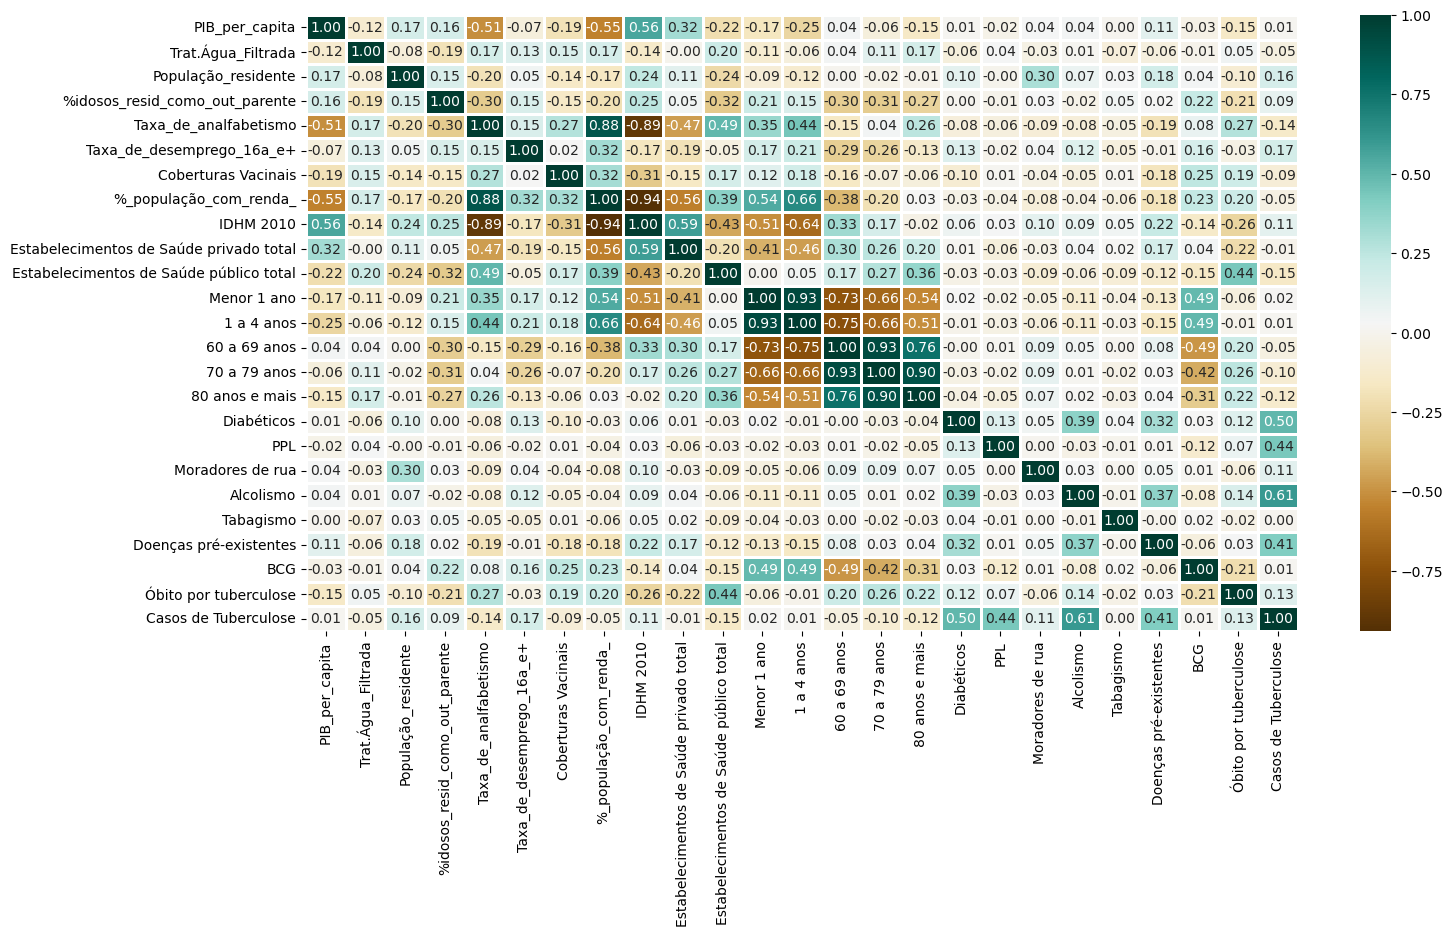

In [102]:
plt.figure(figsize=(16, 8))
sns.heatmap(var_quantitativas.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

### Dicionário:

- **Jogado em terreno baldio ou logradouro:** Número de moradores por lixo jogado em terreno baldio ou logradouro
- **Jogado em rio, lago ou mar:** Número de moradores por lixo jogado em rio, lago ou mar
- **Cobertura Vacinal** Porcentagem de Vacinas com Cobertura Adequada por município



**Estrutura do Projeto**

Serão exploradas técnicas de regressão para a previsão da variável quantitativa "Quantidade de Desistência no Curso". A qualidade da comunicação e apresentação dos resultados também será uma prioridade, assegurando que os resultados sejam compreensíveis para um público amplo.

Este projeto tem como objetivo fornecer previsões robustas e ir além de uma simples análise exploratória de dados. Espera-se que a análise e modelos desenvolvidos ajudem a entender e prever as desistências em cursos de graduação, o que pode ter implicações importantes na melhoria da Educação Superior.

### Merge dos Dados

# Pergunta

Com base no arquivo de 2008, a gente vê se aqueles fatores ainda estão influenciando em 2010


### Data Processing

# Minerando Dados e Características do Dataset

# Modelos de Predição

# Processo e Estatísticas de Validação

# Conclusão 

# Referências Bibliográficas